In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btc = pd.read_csv('./stats_data/BINANCE_BTCUSDT, 1D.csv')
wld = pd.read_csv('./stats_data/BINANCE_WLDUSDT, 1D.csv')
tao = pd.read_csv('./stats_data/BITGET_TAOUSDT, 1D.csv')

In [3]:
for df in [btc, wld, tao]:
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)

In [4]:
tao

,open,high,low,close,TWAP,VWAP,Plot
time,,,,,,,
2023-03-30,60.00,66.08,60.00,65.94,64.006667,64.006667,NaN
2023-03-31,65.94,69.57,58.66,63.49,63.906667,63.906667,NaN
2023-04-01,63.49,66.08,56.80,60.86,61.246667,61.246667,NaN
2023-04-02,60.86,64.58,55.81,59.69,60.026667,60.026667,NaN
2023-04-03,59.69,63.17,57.00,59.77,59.980000,59.980000,NaN
...,...,...,...,...,...,...,...
2024-02-21,623.62,635.27,559.00,629.68,607.983333,607.983333,3.795505
2024-02-22,629.68,637.42,584.91,585.15,602.493333,602.493333,3.762865
2024-02-23,585.15,611.65,572.21,582.00,588.620000,588.620000,3.470444


In [5]:
prices = pd.concat([btc['close'], wld['close'], tao['close']], join='outer', axis=1).fillna(np.nan)
prices.columns = ['BTC', 'WLD', 'TAO']

In [6]:
raw_price_cor = prices.dropna().corr()

Text(0.5, 1.0, 'Price Correlation')

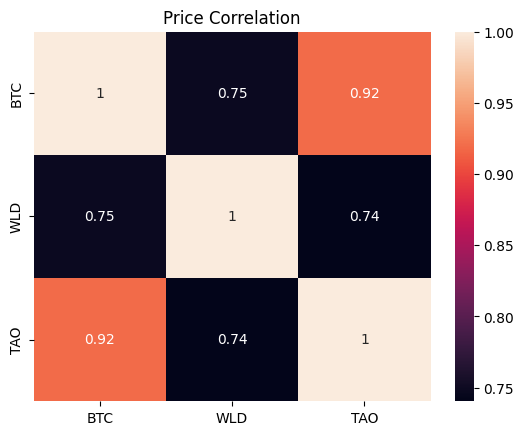

In [7]:
ax = sns.heatmap(prices.dropna().corr(), annot=True)
ax.set_title('Price Correlation')

In [8]:
ret = prices.pct_change().dropna()

Text(0.5, 1.0, 'Return Correlation')

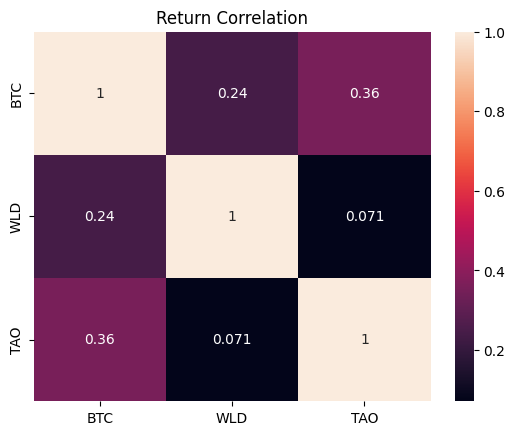

In [9]:
ax = sns.heatmap(ret.dropna().corr(), annot=True)
ax.set_title('Return Correlation')